# Resolver el problema de Fashion-MNIST utilizando funciones de biblioteca. Comparar los modelos LogisticRegression() vs. SGDClassifier();

SGDClassifier es un clasificador lineal generalizado que utilizará el Descenso de gradiente estocástico como solucionador, es fácil de implementar y eficiente, es por eso que este es uno de los solucionadores que se utiliza para las redes neuronales.


La regresión logística es el análisis de regresión apropiado para realizar cuando la variable dependiente es binaria. Como todos los análisis de regresión, la regresión logística es un análisis predictivo. La regresión logística se utiliza para describir datos y explicar la relación entre una variable binaria dependiente y una o más variables independientes nominales, ordinales, de intervalo o de razón.


# 01. Importamos las librerias a usar 


In [1]:
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd 

from sklearn.model_selection import train_test_split 
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

from sklearn.linear_model import LogisticRegression 
from sklearn.linear_model import SGDClassifier 

# 02. Importamos la base de datos para este problema 

In [2]:
df = pd.read_csv(r'data\fashion-mnist_train.csv')

df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
df.shape 

(60000, 785)

En la siguiente linea tiene como funcion restablecer función de índice de pandas, si los datos tienen un multíndice, este método puede eliminar uno o más y luego podemos verificar la forma de los datos

In [4]:
df = df.sample(frac=0.3).reset_index(drop=True)
df.shape 

(18000, 785)

Revisamos los datos 

In [5]:
df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,9,0,0,0,0,0,0,0,0,0,...,2,0,0,81,97,75,20,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,139,64,0,87,209,56,0,0,0,0
4,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# 03 Arreglo de los datos

Renombras los datos a una sola variable, en este caso con el nombre "Varibales"

In [6]:
Variables = {0: 'T-shirt',
             1: 'Trouser',
             2: 'Pullover',
             3: 'Dress',
             4: 'Coat',
             5: 'Sandal',
             6: 'Shirt',
             7: 'Sneaker',
             8: 'bag',
             9: 'Ankle boot'}

Definimos la función display, cuando esta sea llamada mostrará el nombre de la imagen 

In [7]:
def display_image(features, actual_label ):
    print("Actual label:", Variables[actual_label] )
    
    plt.imshow(features.reshape(28,28))

Ahora divimos la información en las variables Y, que tendrá la columna de los nombres, y la varibale X, que tendrá el resto de columnas

In [8]:
X = df[df.columns[1:]]
Y = df['label']

In [9]:
X.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,2,0,0,81,97,75,20,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,139,64,0,87,209,56,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
Y.head()

0    3
1    8
2    9
3    2
4    5
Name: label, dtype: int64

In [11]:
X.loc[5].values[:100]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [12]:
Y.loc[5]

7

Actual label: Sneaker


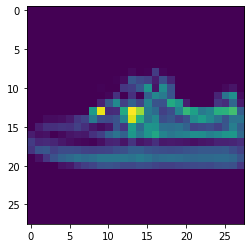

In [13]:
display_image(X.loc[5].values, Y.loc[5])

Actual label: Dress


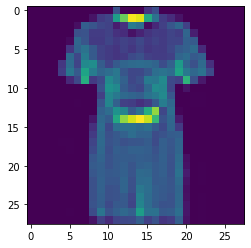

In [14]:
display_image(X.loc[150].values, Y.loc[150])

Actual label: Ankle boot


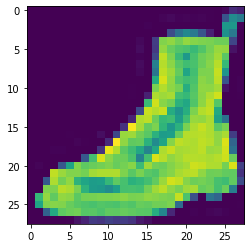

In [15]:
display_image(X.loc[500].values, Y.loc[500])

In [16]:
X = X/25 
X.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.00,0.00,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.00,0.00,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.08,0.00,0.0,3.24,3.88,3.00,0.8,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5.56,2.56,0.0,3.48,8.36,2.24,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.00,0.00,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.0


Ahora con la ayuda de la libreria sklearn dividiremos la información entre datos de entrenamiento y datos de testeo, con una medida del 20%

In [17]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

In [18]:
X_train.shape, X_test.shape

((14400, 784), (3600, 784))

In [19]:
Y_train.shape, Y_test.shape

((14400,), (3600,))

La siguiente función tiene como objetivo presentar un resumen 

In [20]:
def summarize_classification(Y_test, Y_pred):
    acc = accuracy_score(Y_test, Y_pred, normalize=True)
    num_acc =accuracy_score(Y_test, Y_pred, normalize=False)
    
    prec = precision_score(Y_test, Y_pred, average='weighted')
    recall = recall_score(Y_test, Y_pred, average='weighted')
    
    print ("Numero de datos de prueba:",len (Y_test))
    print ("precisión:", num_acc)
    print ("Puntuación de precisión:", acc )
    print ("Puntuación recordada", recall)

# 04 Modelo a usar

Para este problema se ha decidido utilizar el LogisticRegression, pues para datos de 10k o mayores presenta buenos resultados 

In [21]:
logistic_model = LogisticRegression(solver= 'sag', multi_class='auto', max_iter= 20,).fit(X_train,Y_train)

D:\Users\benle\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


La siguiente linea hará las predicciones del modelo presentado anteriormente 

In [22]:
Y_pred = logistic_model.predict(X_test)
Y_pred

array([1, 5, 9, ..., 1, 9, 6], dtype=int64)

# Resultado 

In [23]:
summarize_classification(Y_test, Y_pred)

Numero de datos de prueba: 3600
precisión: 3066
Puntuación de precisión: 0.8516666666666667
Puntuación recordada 0.8516666666666667


Como se puede ver el modelo escogido obiene una precision de 85%, buscando en la web encontramos que este seria de los mas optimos pues aun con metodos de pretratamiento de datos o utilizando SGDClassifier apenas alcanzan un 81% 

# Conslusión 

De este trabajo pudimos observar las ventajas de usar el LogisticRegression: 
1. Es más fácil de implementar.
2. Es muy rápido para clasificar registros desconocidos.
3. Puede sobreajustarse en conjuntos de datos de alta dimensión, entonces podemos usar la técnica de regularización para evitar el sobreajuste.
4. Tiene buena precisión y funciona bien cuando los datos se pueden separar linealmente.

Al menos para este probelma las desventajas que pudimos osbservar y creemos que nos indican cuando usar el logistic y cuando el SDG son: 
1. No se pueden obtener relaciones complejas mediante regresión logística
2. Los problemas no lineales no se pueden resolver con él.

Si juntamos lo aprendido en el proyecto anterior con este podemos ver la importancia de los gradient dscent y sus vairbales, pues si bien no lo usamos de manera directa el LogisticRegression utiliza el SAG, que seria el Stochastic Average Gradient descent 
